---

### Table of Contents
1. Data Source
2. Data Preparation
3. So What's Next
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Conclusion
7. References

---

### Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors to visualizing embeddings. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the understanding of students and also for students to explore beyond, through programming practises, the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8GB
- Disk space: Mininium 8GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - Install latest version of Python 3
- [Anaconda](https://www.anaconda.com/download/) environemnt or any other environement (recommended but not required)
    - Install anaconda environment
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install jupyter
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library

---

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import numpy as mp
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

---

### 1. Data source
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

- *The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

![atl txt](https://docs.google.com/drawings/d/e/2PACX-1vRd845nNXa1x1Enw6IoEbg-05lB19xG3mfO2BjnpZrloT0pSnY89stBV1gS9Iu6cgRCTq3E5giIT5ZI/pub?w=835&h=550)

---

### 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

Let's take at look some of the records that are contained in our subset of the data

In [5]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [6]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [7]:
len(twenty_train.data)

2257

In [8]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [9]:
# An example of what the subset contains
print("\n".join(twenty_train.data[1].split("\n")))

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv domain, i.e  the mesh is a 
	mapping of a 3d Bezier patch into 2d. The area in this domain
	which is inside a trimming loop had to be rendered. The trimming
	loop is a set of 2d Bezier curve segments.
	For the sake of notation: the mesh is made up of cells.

	My problem is this :
	The trimming area has to be split up into individual smaller
	cells bounded by the trimming curve segments. If a cell
	is wholly inside the area...then it is output as a whole ,
	else it is trivially rejected. 

	Does any body know how thiss can be done, or is there any algo. 
	somewhere for doing this.

	Any help would be appreciated.

	Thanks, 
	Ani.
-- 
To get irritated is human, to stay cool, divi

... and determine the label of the example via `target_names` key value

In [10]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


... we can also get the category of 10 documents via `target` key value 

In [11]:
# category of first 10 documents.
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

Note: As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [12]:
for t in twenty_train.target[:50]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med
soc.religion.christian
comp.graphics
alt.atheism
alt.atheism
comp.graphics
comp.graphics
sci.med
alt.atheism
soc.religion.christian
alt.atheism
soc.religion.christian
alt.atheism
soc.religion.christian
comp.graphics
comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med
soc.religion.christian
sci.med
soc.religion.christian
sci.med
soc.religion.christian
alt.atheism
alt.atheism
alt.atheism
comp.graphics
soc.religion.christian
alt.atheism
comp.graphics
comp.graphics
sci.med
alt.atheism
soc.religion.christian
soc.religion.christian
comp.graphics
sci.med


---

### 3. So What's next?
So we want to explore and understand our data a little bit better. Before we do that we definitely need to make some conversions here and there just so we can have our dataset in a nice format to be able to explore it freely. Lucky for us, there are efficient scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table to play with.

---

### 3.1 Converting Dictionary into Pandas dataframe
**Note:** This part is not provided in the original scikit learn tutorial

In [13]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [14]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [15]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [16]:
len(X)

2257

In [17]:
X[0:2]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [18]:
# add category to the dataframe
X['category'] = twenty_train.target

In [19]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
P = X['category_name']

Now we can print screen and see what our table looks like. 

In [20]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Nice! Isn't it? With this format of the data we can conduct many operations, easily and efficiently, since Pandas dataframes provide us with a wide range of built-in features. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like removing records with missing values and aggregating new fields to the current state of the table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. If you are not covinced head on over to Kaggle -- one of the largest data science community on the web -- and see for yourself some of the top kernels and what they make use of. First thing you will notice is the use of Pandas to transform and explore data. Take a look at this [kernel](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python) for example.

I want to also add here that in this notebook we are not following conventions, but we are very interested in using tools and techniques that make our lives easier. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data 

To begin to show you the magnificence of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (news articles), and we only want to keep the `text` and `category_name` attributes or fields.

In [21]:
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### We want the last 10 records

In [22]:
X[-11:-1]

,text,category,category_name
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


Ready for some sourcery? Brace yourselves! Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records. For this we will use the build-in function ``

In [23]:
X.iloc[::10, :][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


** Exercise 0:** Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.   like if you want to querry by catergory

In [24]:
# We can select the first ten rows belonging to category one
X_sample = X.loc[X['category'].isin(['1'])]
X_sample[0:10][["text","category", "category_name"]]


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics


In [25]:
X.sample(n = 10, weights = 'category')

,text,category,category_name
1025,From: shd2001@andy.bgsu.edu (Sherlette Dixon) ...,3,soc.religion.christian
680,From: scott@fcs280s.ncifcrf.gov (Michael Scott...,1,comp.graphics
1152,From: jchen@wind.bellcore.com (Jason Chen) Sub...,2,sci.med
555,From: dxf12@po.cwru.edu (Douglas Fowler) Subje...,3,soc.religion.christian
1638,From: highlndr@ux1.cso.uiuc.edu (The Highlande...,1,comp.graphics
572,From: daveshao@leland.stanford.edu (David Shao...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
1191,From: neal@cmptrc.lonestar.org (Neal Howard) S...,2,sci.med
945,From: Steve.Hayes@f22.n7101.z5.fidonet.org Sub...,3,soc.religion.christian
1359,From: egerter@gaul.csd.uwo.ca (Barry Egerter) ...,1,comp.graphics


In [26]:
# Randomly select any ten records
X.sample(n=10, replace=False)

,text,category,category_name
741,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
465,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1491,From: koberg@spot.Colorado.EDU (Allen Koberg) ...,3,soc.religion.christian
1082,From: ls8139@albnyvms.bitnet (larry silverberg...,2,sci.med
490,From: young@serum.kodak.com (Rich Young) Subje...,2,sci.med
575,From: rowlands@pocomoco.NoSubdomain.NoDomain (...,1,comp.graphics
1719,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
916,From: amann@iam.unibe.ch (Stephan Amann) Subje...,1,comp.graphics
2072,From: caralv@caralv.auto-trol.com (Carol Alvin...,3,soc.religion.christian
937,From: whitsebd@nextwork.rose-hulman.edu (Bryan...,3,soc.religion.christian


In [27]:
# Select a specific row
X.index.name = 'Number'
X.query('Number == "1000"')

,text,category,category_name
Number,,,
1000,From: bobs@thnext.mit.edu (Robert Singleton) S...,0,alt.atheism


### 4. Data Mining using Pandas

Now let's stop playing around and let's do some serious work. Let's learn to program some of the ideas and concepts related to the data mining course. This is the only way we can be convinced of the true power of Pandas dataframes for data mining tasks. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write to code to deal with these object that contain missing value. You will see for yourself how easy it is to deatl with missing values once you have your data transformed into a Pandas dataframe.

First let us do a quick review of what we learned in the Data Mining course. Specifically, how to deal with missing values and how they come about. 

The most common of cases for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patients comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected it either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you loose information. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you be ignore missing values, especially when in this day and age it is difficult to obtain high quality databases. Again, there are some tradeoffs, which will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based appraoch or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. So let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [28]:
X.isnull()

,text,category,category_name
Number,,,
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False


The `isnull` function looks through the entire dataset for null values and return `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` return **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records collected. This excerice will also encourage us to explore the possibilities of pandas dataframes. In reality, the build function are good enough, but as you saw above when the entire table was printed, it is impossible really to tell if there are missing records just by looking at the records manually, especially in cases where the dataset is huge. Let's get to it!

In [29]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each that essentially counts to see if there are missing values in each records and how much missing values are there. In other words the `check_missing_values` function looks through each field in the dataset and counts how many missing values there are. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

**Exercise 1:** Code for how to calculate the missing values for every record instead of every column. Hint `axis` parameter. Check the documentation for more information.

In [30]:
# If we want to check for every row instead of column
X.apply(lambda x: sum(x.isnull().values), axis = 1) 



Number
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2227    0
2228    0
2229    0
2230    0
2231    0
2232    0
2233    0
2234    0
2235    0
2236    0
2237    0
2238    0
2239    0
2240    0
2241    0
2242    0
2243    0
2244    0
2245    0
2246    0
2247    0
2248    0
2249    0
2250    0
2251    0
2252    0
2253    0
2254    0
2255    0
2256    0
Length: 2257, dtype: int64

We have our function to check for missing records, now let us do some bad deed and insert some dummy data into the dataframe. 

In [31]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [32]:
dummy_series

text        dummy_record
category               1
dtype: object

In [33]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [34]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record (specifically a `Series` or what we would usually now as lists) with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe called .

In [35]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [36]:
result_with_series.apply(lambda x: sum(x.isnull().values), axis = 1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2228    0
2229    0
2230    0
2231    0
2232    0
2233    0
2234    0
2235    0
2236    0
2237    0
2238    0
2239    0
2240    0
2241    0
2242    0
2243    0
2244    0
2245    0
2246    0
2247    0
2248    0
2249    0
2250    0
2251    0
2252    0
2253    0
2254    0
2255    0
2256    0
2257    1
Length: 2258, dtype: int64

Indeed there is a missing value in this new dataframe. Specificall, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice also that we are note changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This exercise will challenge to us for the need to remove this dummy records later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [37]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [38]:
X = X.append(dummy_dict,ignore_index=True)

In [39]:
len(X)

2258

In [40]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [41]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [42]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, go to reference the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The only difference between the two is that now there is more of the same. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us keep it to the basics. As we have learned in our Data Mining course, duplicated data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may collected and stored a tweet, and retweet of that same tweet as two different records. The result is case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicates; this all depends on your criteria for what is considered as a duplicate and also what type of data you are dealing with. For text it may not be so trivial as it is for numerical values. Anyhow let us look at some code on how to deal with duplicate records in our `X` dataframe.

First let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` operation that we used to check for missing values. 

In [43]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2227    False
2228    False
2229    False
2230    False
2231    False
2232    False
2233    False
2234    False
2235    False
2236    False
2237    False
2238    False
2239    False
2240    False
2241    False
2242    False
2243    False
2244    False
2245    False
2246    False
2247    False
2248    False
2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicated by simply doing:

In [44]:
sum(X.duplicated())

0

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the operation does is to check per records instead of per column. That is why the operation only returns on value instead of three values for each columns, for each record as before. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular columns instead of all columns we do something as below. As you may have noticed, in this case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicateS by only the text. 

In [45]:
sum(X.duplicated('text'))

0

Now let us create some dummy duplicate data and append it to the main dataframe `X`. And subsequenlty, let us try to get rid of the duplicates.

In [46]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [47]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [48]:
len(X)

2259

In [49]:
sum(X.duplicated('text'))

1

We have added the dummy duplicate to `X`. Now we are faced with the decision as to what to do with the duplicate after we have found it. In our case we want to get rid of all the duplicated records without preserving a copy. So we simple do that with the following line of code:

In [50]:
X.drop_duplicates(keep=False, inplace=True)

In [51]:
len(X)

2257

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

### 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually methods for sampling. The reasons for sampling are sometimes due to the size of data; we want a smaller subset of the data that still best represents the complete dataset. We don't have a problem of size in our dataset since our dataset is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; we only used four categories from the all the 20 categories available. Let us get an idea of what sampling involves in terms of using pandas code.

In [52]:
X_sample = X.sample(n=1000)

In [53]:
len(X_sample)

1000

In [54]:
X_sample[0:15]

,text,category,category_name
2096,From: joel@cs.mcgill.ca (Joel MALARD) Subject:...,2,sci.med
243,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
1070,From: qtm2w@virginia.edu (Quinn T. McCord) Sub...,3,soc.religion.christian
1002,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
1574,Subject: STARGARDTS DISEASE From: kmcvay@oneb....,2,sci.med
467,From: fox@graphics.cs.nyu.edu (David Fox) Subj...,3,soc.religion.christian
628,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med
681,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
833,From: edm@twisto.compaq.com (Ed McCreary) Subj...,0,alt.atheism
1285,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med


Let's do something cool here while we are in sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visually analyze the disparity between the two datasets. To generate some visualizations, we are going to use `Plotly` python library. Plotly is an excellent visualization tool for data scientist to generate interactive charts and to create portable dashboards. 

In [55]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [56]:
X_category_counts = ta.get_tokens_and_frequency(list(X.category_name))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.category_name))

In [57]:
py.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))


In [58]:
py.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category distribution"))

**Exercise 2:** We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the [Plotly documents](https://plot.ly/python/bar-charts/) for tons of examples and ways to visualizing **groups bar charts.** 

In [59]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['soc.religion.christian', 'comp.graphics', 'sci.med', 'alt.atheism'],
    y=[len(X.loc[X['category'].isin(['3'])]), len(X.loc[X['category'].isin(['1'])]), len(X.loc[X['category'].isin(['2'])]), len(X.loc[X['category'].isin(['0'])])],
    name='Orignal'
)
trace2 = go.Bar(
    x=['soc.religion.christian', 'comp.graphics', 'sci.med', 'alt.atheism'],
    y=[len(X_sample .loc[X_sample ['category'].isin(['3'])]), len(X_sample .loc[X_sample ['category'].isin(['1'])]), len(X_sample .loc[X_sample ['category'].isin(['2'])]), len(X_sample .loc[X_sample ['category'].isin(['0'])])],
    name='Sample'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

I must also make mention that there are other libraries for visualizing, but we are going to focus on that in the later sections. For now, we just show you what are the ways to sample and to verify the distributions of your samplings. I can't resits it, but actually, there is an easier to generate the chart we generated above using a library called `matplotlib`. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes. Let's quickly take a loot at the magic of `matplotlib` below.

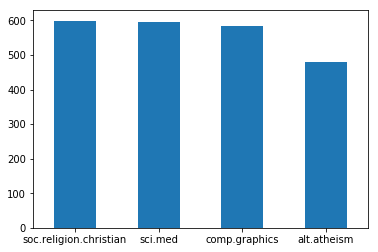

In [60]:
X.category_name.value_counts().plot(kind="bar", rot=0)

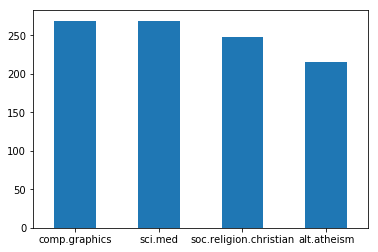

In [61]:
X_sample.category_name.value_counts().plot(kind="bar", rot=0)

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. For now that is. Actually there are many ways to conduct sampling on the dataset and still have a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not clear what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce some basic library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which can be words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [62]:
# takes a like a minute or two to process
#nltk.download()
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [63]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. On first impression, you will notice that the tokenizer is not doing a great job, let us take a closer at a single records and see what was the exact result of the tokenization using the `nltk` library.

In [64]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spacy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it simple does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a litte bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [65]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

What we did with those two lines of code is that we transorfmed the articles into a term-document matrix. Those lines tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [66]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].text)))

['from',
 'stanly',
 'grok11',
 'columbiasc',
 'ncr',
 'com',
 'stanly',
 'subject',
 're',
 'elder',
 'brother',
 'organization',
 'ncr',
 'corp',
 'columbia',
 'sc',
 'lines',
 '15',
 'in',
 'article',
 'apr',
 '00',
 '57',
 '41',
 '1993',
 '28246',
 'athos',
 'rutgers',
 'edu',
 'rexlex',
 'fnal',
 'gov',
 'writes',
 'in',
 'article',
 'apr',
 '01',
 '56',
 '56',
 '1993',
 '22824',
 'athos',
 'rutgers',
 'edu',
 'shrum',
 'hpfcso',
 'fc',
 'hp',
 'com',
 'matt',
 '22',
 '14',
 'go',
 'therefore',
 'to',
 'the',
 'main',
 'highways',
 'and',
 'as',
 'many',
 'as',
 'you',
 'find',
 'there',
 'invite',
 'to',
 'the',
 'wedding',
 'feast',
 'hmmmmmm',
 'sounds',
 'like',
 'your',
 'theology',
 'and',
 'christ',
 'are',
 'at',
 'odds',
 'which',
 'one',
 'am',
 'to',
 'believe',
 'in',
 'this',
 'parable',
 'jesus',
 'tells',
 'the',
 'parable',
 'of',
 'the',
 'wedding',
 'feast',
 'the',
 'kingdom',
 'of',
 'heaven',
 'is',
 'like',
 'unto',
 'certain',
 'king',
 'which',
 'made',
 'm

In [67]:
" ".join(list(X[4:5].text))

'From: stanly@grok11.columbiasc.ncr.com (stanly) Subject: Re: Elder Brother Organization: NCR Corp., Columbia SC Lines: 15  In article <Apr.8.00.57.41.1993.28246@athos.rutgers.edu> REXLEX@fnal.gov writes: >In article <Apr.7.01.56.56.1993.22824@athos.rutgers.edu> shrum@hpfcso.fc.hp.com >Matt. 22:9-14 \'Go therefore to the main highways, and as many as you find >there, invite to the wedding feast.\'...  >hmmmmmm.  Sounds like your theology and Christ\'s are at odds. Which one am I  >to believe?  In this parable, Jesus tells the parable of the wedding feast. "The kingdom of heaven is like unto a certain king which made a marriage for his son". So the wedding clothes were customary,  and "given" to those who "chose" to attend.  This man "refused" to wear the clothes.  The wedding clothes are equalivant to the "clothes of righteousness".  When Jesus died for our sins, those "clothes" were then provided.  Like that man, it is our decision to put the clothes on. '

In [68]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [69]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transofrm` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [70]:
X[0:5]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


In [71]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contain a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [72]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a `00` in the document to see if it is detected as we expect. 

In [73]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

Impressive, huh!

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come to your suprise to things that you can see or the gems you can mine when you start to look at the data from a different perspective>

In [74]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [75]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [76]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [77]:
plot_z = X_counts[0:20, 0:20].toarray()

In [78]:
# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

**Exercise 3:** From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [79]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:1000]]

In [81]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:1000]]
plot_z = X_counts[0:1000, 0:1000].toarray()
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

The draw time for this plot will be slow for all clients.


/home/muziphiwo/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amounty of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [82]:
from sklearn.decomposition import PCA

In [83]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [ ]:
X_reduced.shape

In [ ]:
categories

In [ ]:
trace1 = ta.get_trace(X_reduced, X["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = ta.get_trace(X_reduced, X["category_name"], "sci.med", "rgb(99,151,68)")

In [ ]:
data = [trace1, trace2, trace3, trace4]

In [ ]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

From the 3D visualization above, we see some "hint of separation in the data"; i.e., they have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of word" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

---

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, as we just have to explore the data first to make any premature conclusions. On the topic of attribute transformation, we will take the distribution and put the distribution in a scale that makes the it easy to analyze patterns in the distrubution of words. Let us get into it!

First we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of columns. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j]))

In [ ]:
term_frequencies[0]

In [ ]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

**Exercise 4:** The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise. 

**Exercise 5:** Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.

In [ ]:

term_frequencies[0:1000]



Since we have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the discrepancies between the term frequencies are now better observable. Let us try it out. 

In [ ]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [ ]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is dicussed in detail in the required text book (please refer to it on page 58). People from the Deep Learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concetps. Let us take a look at what we want to achieve in code. 

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

In [ ]:
mlb.classes_

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X[0:9]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with continuous values also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### 6. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training algorithms. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercise and challenge yourself, you have just become an expert. 

From here the possibilities for you are endless. You know how to use almost every technique for preprocessing with state-of-the-art tools, such as as Pandas, which makes even more an expert. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

### 7. References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))